In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# There are four different probabilities p for positive outcomes (r = 1). The probability for negative outcomes (r = -1) is therefore 1-p.
ProbabilityOfPositiveOutcome = np.array([.1, .2, .8, .9]) 

# The task lasts for 800 trials for each probability and there are 5,000 iterations.
NumberOfTrials = 800
NumberOfIterations = 5000

In [5]:
# LearnerIdx refers to the identity of the learner: 0 for optimistic, 1 for rational and 2 for pessimistic
for learnerIdx in range(3):

	# For the optimistic learner, the postive learning rate is set at 0.4, and the negative one at 0.1.
	if learnerIdx == 0:
		alphaPos, alphaNeg = .4, .1

	# For the rational learner, both positive and negative learning rates are set to 0.
	elif learnerIdx == 1:
		alphaPos, alphaNeg = .1, .1

	# For the pessimistic learner, the postive learning rate is set at 0.4, and the negative one at 0.1.
	else:
		alphaPos, alphaNeg = .1, .4

	# The initial value of Qs is set to 0.
	Q = np.zeros((NumberOfIterations, len(ProbabilityOfPositiveOutcome)))

	# ConditionIdx refers to the different possible probabilities for positive outcomes
	for conditionIdx in range(len(ProbabilityOfPositiveOutcome)):

		NumberOfPositiveOutcomes = int(ProbabilityOfPositiveOutcome[conditionIdx] * NumberOfTrials)
		NumberOfNegativeOutcomes = NumberOfTrials - NumberOfPositiveOutcomes

		for iterationIdx in range(NumberOfIterations):

			# We create a vector for the outcomes (r = 1 or r = -1) that will be observed on each trial
			Outcomes = np.concatenate((np.ones((NumberOfPositiveOutcomes,), dtype=np.int), - np.ones((NumberOfNegativeOutcomes,), dtype=np.int)))
			random.shuffle(Outcomes)

			for t in range(NumberOfTrials):
				deltaQ = Outcomes[t] - Q[iterationIdx, conditionIdx]
				Q[iterationIdx, conditionIdx] += alphaPos * deltaQ * (deltaQ >= 0) + alphaNeg * deltaQ * (deltaQ < 0) 

	if learnerIdx == 0:
		meanQoptimistic,  varQoptimistic  = np.mean(Q, axis=0), np.var(Q,  axis=0)
	elif learnerIdx == 1:
		meanQrational,    varQrational    = np.mean(Q, axis=0), np.var(Q,  axis=0)
	else:
		meanQpessimistic, varQpessimistic = np.mean(Q, axis=0), np.var(Q,  axis=0)

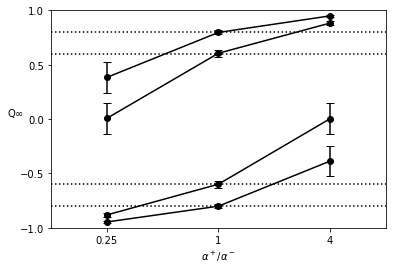

In [6]:
# We now draw the figure 1.
TrueValuesOfQ = [-.8, -.6, .6, .8]
for i in range(4):
	plt.errorbar([0,1,2],[meanQpessimistic[i], meanQrational[i], meanQoptimistic[i]], 
             [varQpessimistic[i], varQrational[i], varQoptimistic[i]], marker='o', color = 'k', capsize = 4, antialiased=True)
	plt.plot([-.5, 2.5], [TrueValuesOfQ[i], TrueValuesOfQ[i]], 'k:', antialiased=True)

plt.axis([-.5, 2.5, -1, 1])

plt.locator_params(axis='y',nbins=5)
plt.ylabel(r'Q$\infty$',rotation=0)
                          
plt.xticks([0, 1, 2], ('0.25', '1', '4'))
plt.xlabel(r'$\alpha^+/ \alpha^-$')

plt.savefig('Figure1.png', dpi=150)
plt.show()